# Kasifikasi menggunakan DNA

## Project Overview

Bekerja dengan Data Urutan DNA untuk Pembelajaran Mesin

Apa itu Urutan DNA? Urutan DNA adalah teknik laboratorium yang digunakan untuk menentukan urutan pasti basa (A, C, G, dan T) dalam molekul DNA. Informasi urutan DNA penting bagi ilmuwan yang menyelidiki fungsi gen. Teknologi urutan DNA telah menjadi lebih cepat dan kurang mahal sebagai bagian dari Proyek Genom Manusia.

Apa itu Gen? Gen adalah sekumpulan instruksi yang menentukan seperti apa organisme tersebut, penampilannya, bagaimana ia bertahan hidup, dan bagaimana ia berperilaku di lingkungannya.

Sebuah gen terdiri dari kombinasi panjang dari empat basa nukleotida yang berbeda, atau bahan kimia. Ada banyak kombinasi yang mungkin.

Empat nukleotida tersebut adalah:

A (adenin), C (sitosin), G (guanin), T (timidin) Kombinasi yang berbeda dari huruf ACGT memberikan karakteristik yang berbeda pada manusia. Misalnya, seseorang dengan kombinasi ATCGTT mungkin memiliki mata biru, sementara seseorang dengan kombinasi ATCGCT mungkin memiliki mata cokelat.

Pengenalan Proyek Dalam komputasi biologis, bekerja dengan data urutan DNA adalah hal yang umum. Mengenal paket Python Biopython akan sangat membantu Anda saat menangani data urutan biologis di Python. Data urutan DNA sering kali disimpan dalam format file yang disebut format "fasta".

Apa itu Format FASTA? Dalam bioinformatika, format FASTA adalah format berbasis teks untuk mewakili urutan nukleotida atau urutan asam amino (protein), di mana nukleotida atau asam amino diwakili menggunakan kode huruf tunggal [A, C, G, T, N] di mana A=Adenosin, C=Sitosin, G=Guanin, T=Timidin dan N= salah satu dari A, C, G, T. Format ini juga memungkinkan nama urutan dan komentar mendahului urutan tersebut.

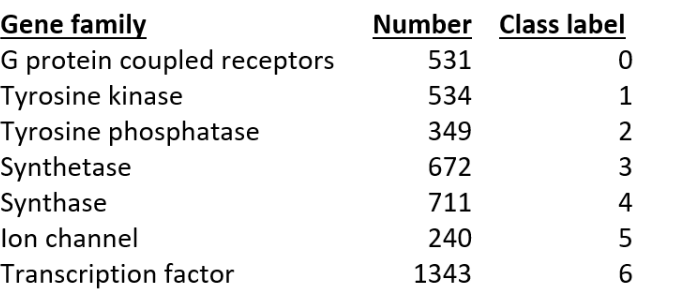

**Gene Family (Label)**
* G Protein: Gen yang mengkode protein yang terlibat dalam transduksi sinyal seluler, berfungsi dalam berbagai proses seluler termasuk pertumbuhan dan respons terhadap sinyal luar.
* Tyrosine Kinase: Gen yang mengkode enzim yang memfosforilasi tirosin pada protein lain, berperan dalam regulasi pertumbuhan sel, diferensiasi, dan proses lain.
* Tyrosine Phosphatase: Gen yang mengkode enzim yang menghapus fosfat dari tirosin pada protein lain, berperan dalam regulasi sinyal sel dan proses metabolik.
* Synthetase: Gen yang mengkode enzim yang terlibat dalam sintesis molekul baru, sering kali menggunakan ATP sebagai sumber energi.
* Synthase: Gen yang mengkode enzim yang terlibat dalam sintesis molekul tanpa penggunaan ATP, biasanya melalui reaksi kondensasi.
* Ion Channel: Gen yang mengkode protein yang membentuk saluran ion, memungkinkan aliran ion tertentu masuk atau keluar dari sel.
* Transcription Factor: Gen yang mengkode protein yang mengikat DNA dan mengatur ekspresi gen dengan mempengaruhi proses transkripsi.

**Tujuan Klasifikasi**
Klasifikasi Gene Family: Dataset ini kemungkinan digunakan untuk mengklasifikasikan urutan DNA atau protein ke dalam keluarga gen yang berbeda. Ini membantu dalam memahami fungsi gen yang berbeda dan perannya dalam berbagai proses biologis.

**Aplikasi Penelitian**: Mengidentifikasi gen dalam kategori gene family tertentu bisa berguna dalam penelitian biologis untuk memahami bagaimana gen berfungsi dalam kesehatan dan penyakit, tetapi dataset ini sendiri tidak langsung mengklasifikasikan gen terkait penyakit.

Bioinformatika: Data ini mungkin digunakan untuk memprediksi fungsi gen atau untuk memahami hubungan antara berbagai gene family dan bagaimana mereka berinteraksi dalam jaringan biologis.

## IMPORT DATA & MODULE

In [2]:
# C:\Users\USER\.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syahmisajid12","key":"a76cee502ebc4268b9b384c1c587dfe1"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d nageshsingh/dna-sequence-dataset

Dataset URL: https://www.kaggle.com/datasets/nageshsingh/dna-sequence-dataset
License(s): unknown
  0% 0.00/1.51M [00:00<?, ?B/s]
100% 1.51M/1.51M [00:00<00:00, 137MB/s]


In [5]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir, view_random_images,pred_and_plot, load_and_prep_image

--2024-09-01 16:46:52--  https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11485 (11K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.22K  --.-KB/s    in 0s      

2024-09-01 16:46:52 (129 MB/s) - ‘helper_functions.py’ saved [11485/11485]



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


## EXPLORATORY DATA ANALYSIS

In [7]:
unzip_data("/content/dna-sequence-dataset.zip")

In [8]:
df = pd.read_table('/content/human.txt')
df.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [9]:
df.shape

(4380, 2)

In [10]:
# Mengecek missing values
df.isnull().sum()

,0
sequence,0
class,0


In [11]:
# Mengecek distribusi kelas
df['class'].value_counts()

,count
class,
6,1343
4,711
3,672
1,534
0,531
2,349
5,240


In [12]:
df["sequence"][0]

'ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG'

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  4380 non-null   object
 1   class     4380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


### Proporsi Class

In [14]:
# Contoh data label sebelum diubah
labels = [1, 2, 3, 4, 5, 6, 7]

# Peta label ke kategori teks
label_mapping = {
    1: "G protein",
    2: "Tyrosine kinase",
    3: "Tyrosine phosphatase",
    4: "Synthetase",
    5: "Synthase",
    6: "Ion channel",
    7: "Transcription factor"
}

# Mengubah label
labels_text = [label_mapping[label] for label in labels]

# Output label yang sudah diubah
print(labels_text)


['G protein', 'Tyrosine kinase', 'Tyrosine phosphatase', 'Synthetase', 'Synthase', 'Ion channel', 'Transcription factor']


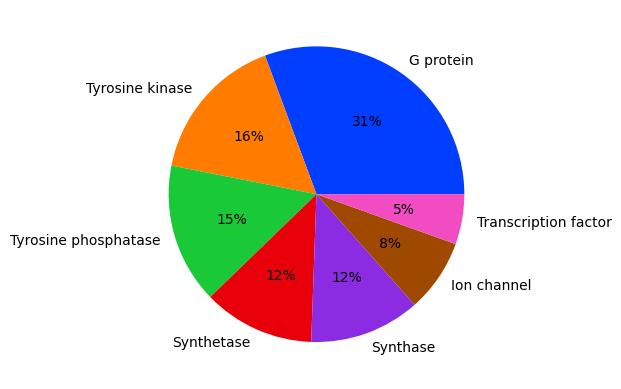

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# declaring data
data = df["class"].value_counts()

# Define labels as the names from the 'class' column
# labels = data.index

# Define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# Plotting data on chart
plt.pie(data, labels=labels_text, colors=palette_color, autopct='%.0f%%')

# Displaying chart
plt.show()


### Distribusi Data

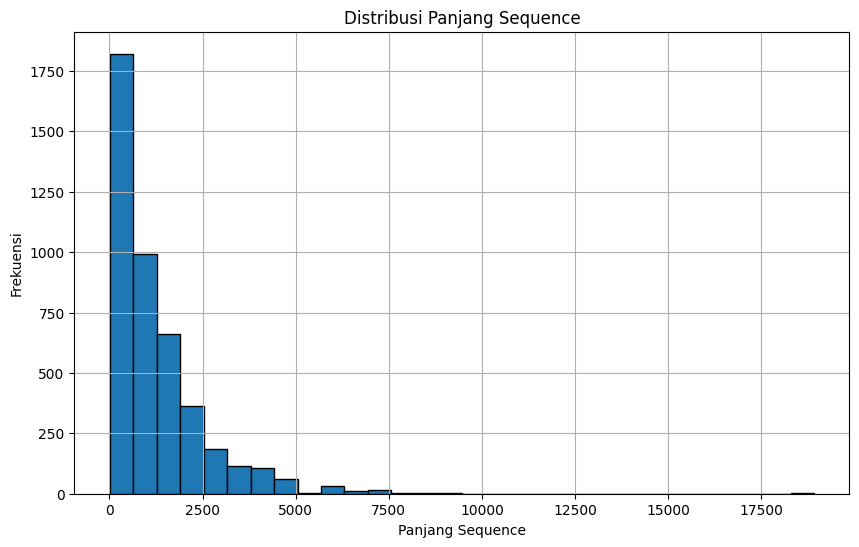

In [16]:
# Menghitung panjang sequence
sequence_lengths = df['sequence'].apply(len)

# Menghitung distribusi panjang sequence
plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=30, edgecolor='black')
plt.title('Distribusi Panjang Sequence')
plt.xlabel('Panjang Sequence')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

In [17]:
# Menemukan panjang dan index sequence terpanjang
longest_seq_length = df['sequence'].apply(len).max()
longest_seq_index = df['sequence'].apply(len).idxmax()

# Menampilkan panjang sequence, sequence itu sendiri, dan index-nya
print("Panjang sequence terpanjang:", longest_seq_length)
print("Sequence terpanjang (index ke-{}):".format(longest_seq_index))
print(df['sequence'].iloc[longest_seq_index])

Panjang sequence terpanjang: 18921
Sequence terpanjang (index ke-1197):
ATGTCGGTGTTCCTGGGGCCAGGGATGCCCTCTGCATCTTTATTAGTAAATCTTCTTTCAGCTTTACTCATCCTATTTGTGTTTGGAGAAACAGAAATAAGATTTACTGGACAAACTGAATTTGTTGTTAATGAAACAAGTACAACAGTTATTCGTCTTATCATTGAAAGGATAGGAGAGCCAGCAAATGTTACTGCAATTGTATCGCTGTATGGAGAGGACGCTGGTGACTTTTTTGACACATATGCTGCAGCTTTTATACCTGCCGGAGAAACAAACAGAACAGTGTACATAGCAGTATGTGATGATGACTTACCAGAGCCTGACGAAACTTTTATTTTTCACTTAACATTACAGAAACCTTCAGCAAATGTGAAGCTTGGATGGCCAAGGACTGTTACTGTGACAATATTATCAAATGACAATGCATTTGGAATTATTTCATTTAATATGCTTCCCTCAATCGCAGTGAGTGAGCCCAAGGGCAGAAATGAGTCTATGCCTCTTACTCTCATCAGGGAAAAGGGAACCTATGGAATGGTCATGGTGACTTTTGAGGTAGAGGGTGGCCCAAATCCCCCTGATGAAGATTTGAGTCCAGTTAAAGGAAATATCACCTTTCCCCCTGGCAGAGCAACAGTAATTTATAACTTGACAGTACTCGATGACGAGGTACCAGAAAATGATGAAATATTTTTAATTCAACTGAAAAGTGTAGAAGGAGGAGCTGAGATTAACACCTCTAGGAATTCCATTGAGATCATCATTAAGAAAAATGATAGTCCCGTGAGATTCCTTCAGAGTATTTATTTGGTTCCTGAGGAAGACCACATACTCATAATTCCAGTAGTTCGTGGAAAGGACAACAATGGAAATCTGATTGGATCTGATGAATATGAGGTTTCAATCAGTTATGCTGTCACAACTG

In [18]:
# Membuat DataFrame untuk distribusi panjang sequence
lengths_df = pd.DataFrame(sequence_lengths, columns=['sequence'])
lengths_df['Range'] = pd.cut(lengths_df['sequence'], bins=range(0, longest_seq_length + 1000, 1000))

# Menghitung frekuensi setiap rentang panjang sequence
distribution = lengths_df['Range'].value_counts().sort_index()

# Menampilkan distribusi dalam bentuk rentang angka
print("\nDistribusi Panjang Sequence:")
for interval, count in distribution.items():
    print(f"Rentang {interval}: {count} sequence")


Distribusi Panjang Sequence:
Rentang (0, 1000]: 2380 sequence
Rentang (1000, 2000]: 1154 sequence
Rentang (2000, 3000]: 464 sequence
Rentang (3000, 4000]: 170 sequence
Rentang (4000, 5000]: 136 sequence
Rentang (5000, 6000]: 33 sequence
Rentang (6000, 7000]: 18 sequence
Rentang (7000, 8000]: 14 sequence
Rentang (8000, 9000]: 7 sequence
Rentang (9000, 10000]: 3 sequence
Rentang (10000, 11000]: 0 sequence
Rentang (11000, 12000]: 0 sequence
Rentang (12000, 13000]: 0 sequence
Rentang (13000, 14000]: 0 sequence
Rentang (14000, 15000]: 0 sequence
Rentang (15000, 16000]: 0 sequence
Rentang (16000, 17000]: 0 sequence
Rentang (17000, 18000]: 0 sequence
Rentang (18000, 19000]: 1 sequence


## Pre-processing

### Outlier Handling

In [19]:
import pandas as pd

# Misalkan df adalah DataFrame yang sudah ada dan 'sequence' adalah kolom yang berisi sequence

# Definisikan panjang maksimum
max_length = 9000

# Fungsi untuk memangkas sequence yang lebih panjang dari max_length
def truncate_sequence(seq, max_len):
    if len(seq) > max_len:
        return seq[:max_len]
    else:
        return seq

# Terapkan fungsi ke kolom 'sequence'
df['sequence'] = df['sequence'].apply(lambda x: truncate_sequence(x, max_length))

# Menampilkan beberapa baris untuk memastikan perubahan
df.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


### Kmers

In [20]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [21]:
df["words"]=df.apply(lambda x: getKmers(x["sequence"]),axis=1)
df=df.drop("sequence",axis=1)
df.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [22]:
df_texts=list(df["words"])
for item in range(len(df_texts)):
    df_texts[item] = ' '.join(df_texts[item])
y = df.iloc[:, 0].values

In [23]:
y.shape

(4380,)

In [24]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(df_texts)

In [25]:
X.shape

(4380, 232357)

### Splitting Data

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
print(x_train.shape)
print(x_test.shape)

(3504, 232357)
(876, 232357)


## Modelling

### Naive bayes

In [28]:
### Multinomial Naive Bayes Classifier ###
# The alpha parameter was determined by grid search previously
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.1)

In [29]:
y_pred = classifier.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           0    0   0    0  143   0    6
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984
